# Predicting Financial Wellnes Score category( High, Medium or Low) based on the following variables
   # CHANGEABLE - Belief that ability to manage money is NOT changeable 
   # ABSORBSHOCK - Confidence in ability to raise 2,000 in the next 30 days
   # SELFCONTROL_3 - I am able to work diligently toward long-term goals 
   # PEM - Everyone has a fair chance at moving up the economic ladder 
   # PPEDUC - Education (Highest Degree Received)

## Loading the packages needed

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

## Load the dataset

In [7]:
FinData = pd.read_csv("C:/Users/lucie/Documents/Bethel/Final Project/Data Sets/National Financial Well Being Survey/NFWBS_PUF_2016_data.csv")

In [8]:
FinData.head()

,PUF_ID,sample,fpl,SWB_1,SWB_2,SWB_3,FWBscore,FWB1_1,FWB1_2,FWB1_3,...,PPMSACAT,PPREG4,PPREG9,PPT01,PPT25,PPT612,PPT1317,PPT18OV,PCTLT200FPL,finalwt
0,10350,2,3,5,5,6,55,3,3,3,...,1,4,8,0,0,0,0,1,0,0.367292
1,7740,1,3,6,6,6,51,2,2,3,...,1,2,3,0,0,0,0,2,0,1.327561
2,13699,1,3,4,3,4,49,3,3,3,...,1,4,9,0,0,0,1,2,1,0.835156
3,7267,1,3,6,6,6,49,3,3,3,...,1,3,7,0,0,0,0,1,0,1.410871
4,7375,1,3,4,4,4,49,3,3,3,...,1,2,4,0,0,1,0,4,1,4.260668


## Subsetting the data with only the columns required

In [9]:
FinDataSubset = FinData[['CHANGEABLE','ABSORBSHOCK','SELFCONTROL_3','PEM','PPEDUC','FWBscore']]

In [10]:
FinDataSubset.head()

,CHANGEABLE,ABSORBSHOCK,SELFCONTROL_3,PEM,PPEDUC,FWBscore
0,4,4,3,3,4,55
1,2,3,3,4,2,51
2,6,4,3,6,3,49
3,-1,8,-1,-1,2,49
4,4,2,3,4,2,49


## Selecting only rows with values greater than 0, -1 means the participant refused to answer the question. 

In [11]:
FinDataSubset2 = FinDataSubset[FinDataSubset['CHANGEABLE'] > 0]

In [12]:
FinDataSubset2.head()

,CHANGEABLE,ABSORBSHOCK,SELFCONTROL_3,PEM,PPEDUC,FWBscore
0,4,4,3,3,4,55
1,2,3,3,4,2,51
2,6,4,3,6,3,49
4,4,2,3,4,2,49
5,1,4,3,7,4,67


In [13]:
FinDataSubset2.count()

CHANGEABLE       6356
ABSORBSHOCK      6356
SELFCONTROL_3    6356
PEM              6356
PPEDUC           6356
FWBscore         6356
dtype: int64

In [14]:
FinDataSubset2 = FinDataSubset2[FinDataSubset2['ABSORBSHOCK'] > 0]

In [15]:
FinDataSubset2.count()

CHANGEABLE       6330
ABSORBSHOCK      6330
SELFCONTROL_3    6330
PEM              6330
PPEDUC           6330
FWBscore         6330
dtype: int64

In [16]:
FinDataSubset2 = FinDataSubset2[FinDataSubset2['SELFCONTROL_3'] > 0]

In [17]:
FinDataSubset2.count()

CHANGEABLE       6308
ABSORBSHOCK      6308
SELFCONTROL_3    6308
PEM              6308
PPEDUC           6308
FWBscore         6308
dtype: int64

In [18]:
FinDataSubset2 = FinDataSubset2[FinDataSubset2['PEM'] > 0]

In [19]:
FinDataSubset2.count()

CHANGEABLE       6276
ABSORBSHOCK      6276
SELFCONTROL_3    6276
PEM              6276
PPEDUC           6276
FWBscore         6276
dtype: int64

In [20]:
FinDataSubset2 = FinDataSubset2[FinDataSubset2['PPEDUC'] > 0]

In [21]:
FinDataSubset2.count()

CHANGEABLE       6276
ABSORBSHOCK      6276
SELFCONTROL_3    6276
PEM              6276
PPEDUC           6276
FWBscore         6276
dtype: int64

## Subsetting some more, selecting the first 1000 records from FinDataSubset2

In [22]:
FinDataSubset3 = FinDataSubset2[1:1001]

In [23]:
FinDataSubset3.count()

CHANGEABLE       1000
ABSORBSHOCK      1000
SELFCONTROL_3    1000
PEM              1000
PPEDUC           1000
FWBscore         1000
dtype: int64

## Visualize the FWBscore

<AxesSubplot:>

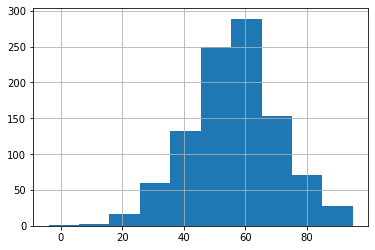

In [24]:
FinDataSubset3.FWBscore.hist()

## Recoding the FWBscore from numeric to categorical for categorization


In [25]:
def ScoreRecode (series):
    if series < 51:
        return "Low"
    if series > 79:
        return "High"
    else:
        return "Medium"

In [54]:
FinDataSubset3['FWBscoreR'] = FinDataSubset3['FWBscore'].apply(ScoreRecode)

C:\Users\lucie\AppData\Local\Temp/ipykernel_15412/2190589064.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinDataSubset3['FWBscoreR'] = FinDataSubset3['FWBscore'].apply(ScoreRecode)


# Recoding the CHANGEABLE variable to change the direction of the answers to be positive

In [27]:
def ChangeableRecode (series):
    if series == 1:
        return 7
    if series == 2:
        return 6
    if series == 3:
        return 5
    if series == 4:
        return 4
    if series == 5:
        return 3
    if series == 6:
        return 2
    if series == 7:
        return 1
   

In [55]:
FinDataSubset3['CHANGEABLEr'] = FinDataSubset3['CHANGEABLE'].apply(ChangeableRecode)

C:\Users\lucie\AppData\Local\Temp/ipykernel_15412/355634840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  FinDataSubset3['CHANGEABLEr'] = FinDataSubset3['CHANGEABLE'].apply(ChangeableRecode)


In [56]:
pd.set_option('display.max_rows', None)

In [57]:
FinDataSubset3.loc[1:100]

,CHANGEABLE,ABSORBSHOCK,SELFCONTROL_3,PEM,PPEDUC,FWBscore,FWBscoreR,CHANGEABLEr
1,2,3,3,4,2,51,Medium,6
2,6,4,3,6,3,49,Low,2
4,4,2,3,4,2,49,Low,4
5,1,4,3,7,4,67,Medium,7
6,4,4,3,5,4,51,Medium,4
7,4,1,1,2,1,47,Low,4
9,3,4,3,6,2,58,Medium,5
10,3,4,4,6,3,78,Medium,5
11,3,4,3,6,4,62,Medium,5
12,5,3,3,5,3,50,Low,3


# Performing k nearest neighbor analysis

## Scaling the data

In [52]:
scaler = StandardScaler()

In [59]:
FinDataSubset3.head()

,CHANGEABLE,ABSORBSHOCK,SELFCONTROL_3,PEM,PPEDUC,FWBscore,FWBscoreR,CHANGEABLEr
1,2,3,3,4,2,51,Medium,6
2,6,4,3,6,3,49,Low,2
4,4,2,3,4,2,49,Low,4
5,1,4,3,7,4,67,Medium,7
6,4,4,3,5,4,51,Medium,4


In [60]:
scaler.fit(FinDataSubset3.drop(['FWBscore','FWBscoreR','CHANGEABLE'], axis=1))

StandardScaler()

In [61]:
scaledVariables = scaler.transform(FinDataSubset3.drop(['FWBscore','FWBscoreR','CHANGEABLE'], axis=1))

In [67]:
scaledVariables

array([[-0.36059201, -0.10286335, -0.3413438 , -1.11417203,  1.05485167],
       [ 0.33958665, -0.10286335,  0.81379597, -0.27010231, -1.48237423],
       [-1.06077066, -0.10286335, -0.3413438 , -1.11417203, -0.21376128],
       ...,
       [ 0.33958665, -0.10286335, -0.91891369,  0.57396741,  1.05485167],
       [ 0.33958665, -0.10286335,  0.81379597,  1.41803713, -1.48237423],
       [ 0.33958665, -1.57233973,  0.23622608, -0.27010231,  1.68915814]])

In [70]:
FinDataScaled = pd.DataFrame(scaledVariables, columns=['ABSORBSHOCK','SELFCONTROL_3','PEM','PPEDUC','CHANGEABLEr'])

In [71]:
FinDataScaled.head(20)

,ABSORBSHOCK,SELFCONTROL_3,PEM,PPEDUC,CHANGEABLEr
0,-0.360592,-0.102863,-0.341344,-1.114172,1.054852
1,0.339587,-0.102863,0.813796,-0.270102,-1.482374
2,-1.060771,-0.102863,-0.341344,-1.114172,-0.213761
3,0.339587,-0.102863,1.391366,0.573967,1.689158
4,0.339587,-0.102863,0.236226,0.573967,-0.213761
5,-1.760949,-3.041816,-1.496484,-1.958242,-0.213761
6,0.339587,-0.102863,0.813796,-1.114172,0.420545
7,0.339587,1.366613,0.813796,-0.270102,0.420545
8,0.339587,-0.102863,0.813796,0.573967,0.420545
9,-0.360592,-0.102863,0.236226,-0.270102,-0.848068


# Create X and Y datasets

In [72]:
x = FinDataScaled
y = FinDataSubset3['FWBscoreR']

# Train Test Split

In [73]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3, random_state=101)

# KNN Analysis

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [75]:
pred

array(['Medium', 'Low', 'High', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'Medium', 'Low', 'Low', 'Medium', 'Low', 'Medium',
       'Low', 'Medium', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Medium', 'Medium', 'Low', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Medium', 'Medium', 'Medium', 'Low', 'Medium', 'High',
       'Low', 'High', 'Medium', 'Medium', 'Medium', 'Medium', 'Medium',
       'Medium', 'Medium', 'Low', 'Medium', 'Medium', 'Low', 'Low',
       'Medium', 'Low', 'Medium', 'Low', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'High', 'Medium', 'Medium', 'Medium', 'Low',
       'Medium', 'Low', 'Low', 'Low', 'Medium', 'Low', 'Medium', 'Medium',
       'Low', 'Medium', 'High', 'Low', 'Medium', 'Low', 'Low', 'Medium',
       'Medium', 'Low', 'Low', 'Low', 'Medium', 'Medium', 'Medium', 'Low',
       'High', 'Medium', 'Low', 'Medium', 'Medium', 'Medium', 'Medium',
    

# Generating the confusion matrix
# Classification Report to validate the accuracy of the prediction

In [76]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[  5   3  10]
 [  0  63  33]
 [ 21  36 129]]
              precision    recall  f1-score   support

        High       0.19      0.28      0.23        18
         Low       0.62      0.66      0.64        96
      Medium       0.75      0.69      0.72       186

    accuracy                           0.66       300
   macro avg       0.52      0.54      0.53       300
weighted avg       0.67      0.66      0.66       300



# This model using 1 as the neighbors count was 67% accurate in predicting the Financial Wellness Score. Now will run the KNN with iterations from 1 to 40 to find the best model.

In [77]:
errorRate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train,y_train)
    predI=knn.predict(x_test)
    errorRate.append(np.mean(predI != y_test))

In [87]:
errorRate

[0.3433333333333333,
 0.4166666666666667,
 0.3,
 0.2966666666666667,
 0.27666666666666667,
 0.25666666666666665,
 0.25,
 0.23666666666666666,
 0.23666666666666666,
 0.23333333333333334,
 0.23333333333333334,
 0.23666666666666666,
 0.24,
 0.23333333333333334,
 0.24,
 0.23,
 0.24333333333333335,
 0.23666666666666666,
 0.23666666666666666,
 0.23666666666666666,
 0.23666666666666666,
 0.23666666666666666,
 0.23666666666666666,
 0.22666666666666666,
 0.22666666666666666,
 0.22,
 0.22666666666666666,
 0.23,
 0.22666666666666666,
 0.22333333333333333,
 0.22,
 0.22666666666666666,
 0.23666666666666666,
 0.24,
 0.25,
 0.24333333333333335,
 0.24333333333333335,
 0.24666666666666667,
 0.25666666666666665]

# Plot the errorRate  vs K value

Text(0, 0.5, 'Error Rate')

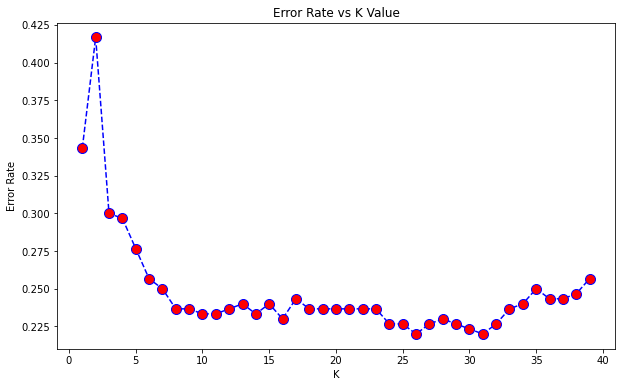

In [78]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40), errorRate,color='blue', linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# We can see that with a K of 26 or 31 the error rate is the lowest at 22% and therefore should be the best model when running the KNN analysis using 26 or 31 as the neighbors. The error rate with 1 neighbor is 42%

In [79]:
knn = KNeighborsClassifier(n_neighbors=26)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [81]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[  0   0  18]
 [  0  66  30]
 [  0  18 168]]
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        18
         Low       0.79      0.69      0.73        96
      Medium       0.78      0.90      0.84       186

    accuracy                           0.78       300
   macro avg       0.52      0.53      0.52       300
weighted avg       0.73      0.78      0.75       300



C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [82]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [83]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[  0   0  18]
 [  0  65  31]
 [  0  17 169]]
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        18
         Low       0.79      0.68      0.73        96
      Medium       0.78      0.91      0.84       186

    accuracy                           0.78       300
   macro avg       0.52      0.53      0.52       300
weighted avg       0.73      0.78      0.75       300



C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [84]:
knn = KNeighborsClassifier(n_neighbors=24)
knn.fit(x_train, y_train)
pred = knn.predict(x_test)

In [86]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test,pred))

[[  0   0  18]
 [  0  66  30]
 [  0  20 166]]
              precision    recall  f1-score   support

        High       0.00      0.00      0.00        18
         Low       0.77      0.69      0.73        96
      Medium       0.78      0.89      0.83       186

    accuracy                           0.77       300
   macro avg       0.51      0.53      0.52       300
weighted avg       0.73      0.77      0.75       300



C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\lucie\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



# The model using k = 31  was the most accurate model.  
# ------------------------Original Model   |   Improved Model
# Overall accuracy------------  |        67%           |                  73%
# High Score---------------------|        19%           |                   0%
# Medium Score ----------------|         75%           |                 79%
# Low Score ---------------------|          62%          |                 78%
